In [1]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('bert-base-nli-mean-tokens')
model

Downloading:   0%|          | 0.00/391 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.95k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/399 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

SentenceTransformer(
  (0): Transformer({'max_seq_length': 128, 'do_lower_case': False}) with Transformer model: BertModel 
  (1): Pooling({'word_embedding_dimension': 768, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False})
)

In [2]:
sentences = [
    "the fifty mannequin heads floating in the pool kind of freaked them out",
    "she swore she just saw her sushi move",
    "he embraced his new life as an eggplant",
    "my dentist tells me that chewing bricks is very bad for your teeth",
    "the dental specialist recommended an immediate stop to flossing with construction materials"
]

In [4]:
embeddings = model.encode(sentences)
embeddings

array([[-0.18893535,  0.1838044 , -0.51321477, ..., -0.9622859 ,
         0.16144815, -0.185476  ],
       [-0.02548085, -0.06504299,  0.8549068 , ..., -0.08297339,
        -0.26982766, -0.09522331],
       [-0.05365521, -0.10092866,  0.99919367, ...,  1.135775  ,
         0.01794505, -0.24008043],
       [ 0.21320134,  1.8518622 ,  0.36619228, ...,  0.00735269,
         0.31327724,  0.41728255],
       [ 0.17712386,  1.5110041 ,  0.9627546 , ...,  0.07071631,
        -0.27150497,  0.3425452 ]], dtype=float32)

In [5]:
embeddings.shape

(5, 768)

In [7]:
import numpy as np
from sentence_transformers.util import cos_sim as cs

sim = np.zeros((len(sentences), len(sentences)))

for i in range(len(sentences)):
    sim[i:, i] = cs(embeddings[i], embeddings[i:])

sim

array([[1.00000024, 0.        , 0.        , 0.        , 0.        ],
       [0.40914342, 1.        , 0.        , 0.        , 0.        ],
       [0.10909029, 0.44547975, 0.99999988, 0.        , 0.        ],
       [0.50074875, 0.30693948, 0.20791666, 1.00000012, 0.        ],
       [0.29936224, 0.38607222, 0.28499281, 0.63849497, 0.99999988]])

<AxesSubplot:>

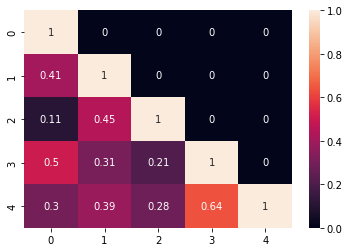

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(sim, annot=True)

In [9]:
sentences

['the fifty mannequin heads floating in the pool kind of freaked them out',
 'she swore she just saw her sushi move',
 'he embraced his new life as an eggplant',
 'my dentist tells me that chewing bricks is very bad for your teeth',
 'the dental specialist recommended an immediate stop to flossing with construction materials']